In [1]:
# project: p2
# submitter: hbian8
# partner: none
# hours: 10
import loans
import search


#values
values = {'activity_year': '2020', 'lei': '549300FX7K8PTEQUU487', 'derived_msa-md': '31540', 'state_code': 'WI',
         'county_code': '55025', 'census_tract': '55025002402', 'conforming_loan_limit': 'C',
         'derived_loan_product_type': 'Conventional:First Lien',
         'derived_dwelling_category': 'Single Family (1-4 Units):Site-Built',
         'derived_ethnicity': 'Not Hispanic or Latino', 'derived_race': 'White', 'derived_sex': 'Male',
         'action_taken': '3', 'purchaser_type': '0', 'preapproval': '2', 'loan_type': '1', 'loan_purpose': '4',
         'lien_status': '1', 'reverse_mortgage': '2', 'open-end_line_of_credit': '1',
         'business_or_commercial_purpose': '2', 'loan_amount': '225000.0', 'loan_to_value_ratio': '78.671',
         'interest_rate': '3.000', 'rate_spread': 'NA', 'hoepa_status': '3', 'total_loan_costs': 'NA',
         'total_points_and_fees': 'NA', 'origination_charges': 'NA', 'discount_points': 'NA',
         'lender_credits': 'NA', 'loan_term': '360', 'prepayment_penalty_term': 'NA', 'intro_rate_period': '1',
         'negative_amortization': '2', 'interest_only_payment': '2', 'balloon_payment': '2',
         'other_nonamortizing_features': '2', 'property_value': '285000', 'construction_method': '1',
         'occupancy_type': '1', 'manufactured_home_secured_property_type': '3',
         'manufactured_home_land_property_interest': '5', 'total_units': '1', 'multifamily_affordable_units': 'NA',
         'income': '0', 'debt_to_income_ratio': '>60%', 'applicant_credit_score_type': '1',
         'co-applicant_credit_score_type': '10', 'applicant_ethnicity-1': '2', 'applicant_ethnicity-2': '',
         'applicant_ethnicity-3': '', 'applicant_ethnicity-4': '', 'applicant_ethnicity-5': '',
         'co-applicant_ethnicity-1': '5', 'co-applicant_ethnicity-2': '', 'co-applicant_ethnicity-3': '',
         'co-applicant_ethnicity-4': '', 'co-applicant_ethnicity-5': '', 'applicant_ethnicity_observed': '2',
         'co-applicant_ethnicity_observed': '4', 'applicant_race-1': '5', 'applicant_race-2': '',
         'applicant_race-3': '', 'applicant_race-4': '', 'applicant_race-5': '', 'co-applicant_race-1': '8',
         'co-applicant_race-2': '', 'co-applicant_race-3': '', 'co-applicant_race-4': '', 'co-applicant_race-5': '',
         'applicant_race_observed': '2', 'co-applicant_race_observed': '4', 'applicant_sex': '1',
         'co-applicant_sex': '5', 'applicant_sex_observed': '2', 'co-applicant_sex_observed': '4',
         'applicant_age': '55-64', 'co-applicant_age': '9999', 'applicant_age_above_62': 'Yes',
         'co-applicant_age_above_62': 'NA', 'submission_of_application': '1', 'initially_payable_to_institution': '1',
         'aus-1': '6', 'aus-2': '', 'aus-3': '', 'aus-4': '', 'aus-5': '', 'denial_reason-1': '1',
         'denial_reason-2': '', 'denial_reason-3': '', 'denial_reason-4': '', 'tract_population': '3572',
         'tract_minority_population_percent': '41.1499999999999986', 'ffiec_msa_md_median_family_income': '96600',
         'tract_to_msa_income_percentage': '64', 'tract_owner_occupied_units': '812',
         'tract_one_to_four_family_homes': '910', 'tract_median_age_of_housing_units': '45'}
applicant = loans.Applicant("20-30", ["1", "2", "3"])
applicant.race

{'American Indian or Alaska Native', 'Asian', 'Black or African American'}

In [2]:
fhb = loans.Bank("First Home Bank")

In [3]:
#q1
interest_rate_list = []
for loan in fhb:
    if loan.interest_rate != -1:
        interest_rate_list.append(loan.interest_rate)
sum(interest_rate_list)/len(interest_rate_list)

2.962962962962963

In [4]:
#q2
applicants = []
for loan in fhb:
    applicants.append(len(loan.applicants))
sum(applicants)/len(applicants)

1.5777777777777777

In [5]:
#q3
age_dict = {}
for loan in fhb:
    for applicant in loan.applicants:
        if applicant.age not in age_dict:
            age_dict[applicant.age] = 1
        else:
            age_dict[applicant.age] += 1
age_dict

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [6]:
loan_tree = search.BST()
for loan in fhb:
    loan_tree.add(loan.interest_rate, loan)

In [7]:
#q4
len(loan_tree[-1])

18

In [8]:
#q5
def height(node):
    if node == None:
        return 0
    return max(height(node.left), height(node.right)) + 1
height(loan_tree.root)

9

In [9]:
uwcu = loans.Bank("University of Wisconsin Credit Union")
uwcu_tree = search.BST()

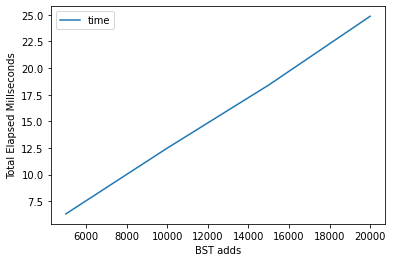

In [10]:
#q6
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

rows = [5000, 10000, 15000, 20000]
times_df = pd.DataFrame(dtype=float, columns=["time"])
for row in rows:
    time1 = time.time()
    for loan, i in zip(uwcu, range(row)):
        uwcu_tree.add(loan.interest_rate, loan)
    time2 = time.time()
    times_df.loc[row] = (time2 - time1)*1000
loopplot = times_df.plot.line()
loopplot.set_xlabel("BST adds")
loopplot.set_ylabel("Total Elapsed Millseconds")
None

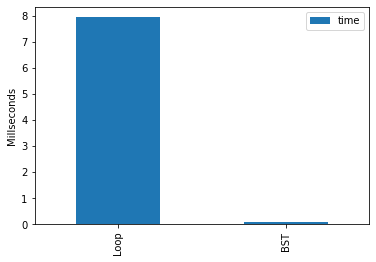

In [11]:
#q7
times_df = pd.DataFrame(dtype=float)
counts = 0
time1 = time.time()
for loan in uwcu:
    if loan.interest_rate == -1:
        counts += 1
time2 = time.time()
times_df.at["Loop", "time"] = (time2 - time1)*1000
time1 = time.time()
len(uwcu_tree[-1])
time2 = time.time()
times_df.at["BST", "time"] = (time2 - time1)*1000
loopplot = times_df.plot.bar()
loopplot.set_ylabel("Millseconds")
None

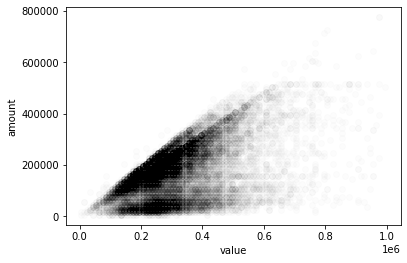

In [12]:
#q8
value = []
amount = []
for loan in uwcu:
    if loan.property_value <= 1e6 and loan.property_value >= 0:
        value.append(loan.property_value)
        amount.append(loan.loan_amount)
plt.scatter(value, amount, alpha = 0.01, color = "black")
y = np.arange(0, 1000000, 200000)
plt.yticks(y)
plt.xlabel('value')
plt.ylabel('amount')
plt.show()
# loopplot = times_df.plot.scatter()
# loopplot.set_xlabel("value")
# loopplot.set_ylabel("amount")

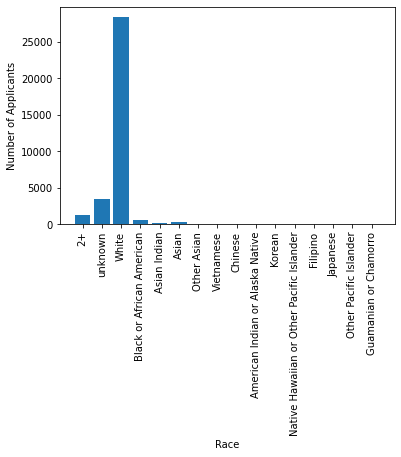

In [13]:
#q9
race_counts = {}
race_counts["2+"] = 0
race_counts["unknown"] = 0
for loan in uwcu:
    for applicant in loan.applicants:
        if len(applicant.race) == 0:
            race_counts["unknown"] += 1
        elif len(applicant.race) >= 2:
            race_counts["2+"] += 1
        else:
            for race in applicant.race:
                if race not in race_counts:
                    race_counts[race] = 1
                else:
                    race_counts[race] += 1
                    
plt.bar(list(race_counts.keys()), list(race_counts.values()))
plt.xticks(rotation = 90)
plt.xlabel('Race')
plt.ylabel('Number of Applicants')
plt.show()

In [14]:
#q10
def count_node(node):
    if node == None:
        return 0;
    return count_node(node.left) + count_node(node.right) + 1
count_node(uwcu_tree.root)

32